In [2]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

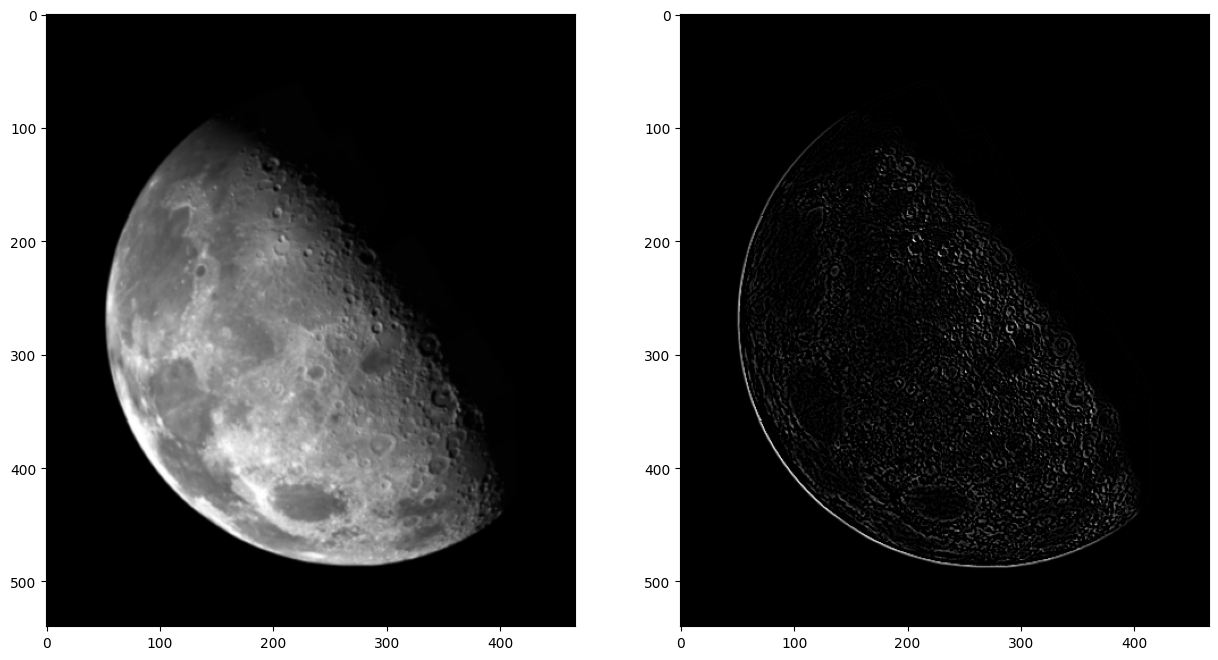

In [15]:
img = cv.imread("images/moon.tif", cv.IMREAD_GRAYSCALE)
kernel = np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

m, n = kernel.shape
pm = (m-1)//2
pn = (n-1)//2

out_img = np.zeros_like(img).astype('int8')
padded_img = np.pad(img, ((pm, pm), (pn,pn)), mode='constant', constant_values=0)

rows = img.shape[0]
cols = img.shape[1]

for row in range(rows):
    for col in range(cols):
        sum = np.sum(kernel * padded_img[row: row + m, col:col + n])
        out_img[row, col] = sum


scaled_lap_image = np.clip(out_img, 0, 255)

fig, axe = plt.subplots(1,2, figsize=(15,10))
axe[0].imshow(img, cmap='gray')
axe[1].imshow(scaled_lap_image, cmap='gray')



(np.float64(-0.5), np.float64(465.5), np.float64(539.5), np.float64(-0.5))

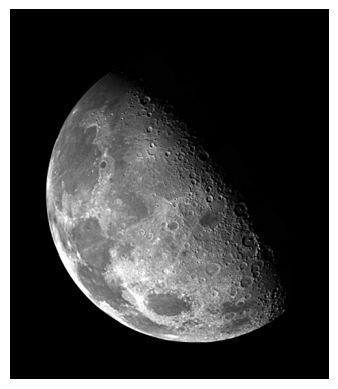

In [ ]:
# sharped image with kernel -4
sharpened_image = np.clip(img - out_img, 0, 255) 
plt.imshow(sharpened_image, cmap = 'gray')
plt.axis('off')

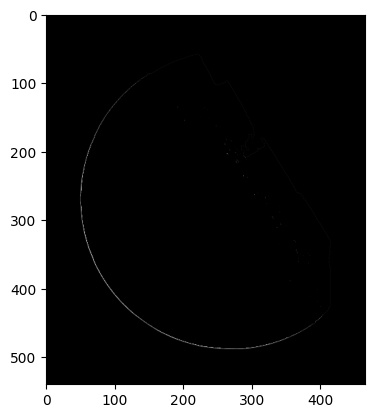

In [ ]:
# using the kerenl with -8 

from multiprocessing.forkserver import read_signed


kernel = np.array([
    [0,1,0],
    [1,-8,1],
    [0,1,0]
])

m,n = kernel.shape
pm,pn = (m - 1)//2,(n - 1)//2

padded_img2 = np.pad(img, ((pm,pm),(pn,pn)), mode='constant', constant_values=0)
out_img2 = np.zeros_like(img).astype('int16')

rows = img.shape[0]
cols = img.shape[1]


for row in range(rows):
    for col in range(cols):
        sum = np.sum(kernel * padded_img[row:row+m, col:col + n])
        out_img2[row, col] = sum

out_img2 = np.clip(out_img2, 0, 255)
plt.imshow(out_img2, cmap='gray')

